In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 
from matplotlib.gridspec import GridSpec
%matplotlib inline

data = pd.read_csv("hour.csv")
data = data.set_index("instant")
y = data['cnt']
X = data.drop(['atemp','registered', 'casual','cnt','dteday'], axis = 1)
# Split the dataset to trainand test data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.28, random_state=9)

In [26]:
data.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [32]:
data.tail()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
17375,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17379,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [9]:
data = data.drop(['dteday','yr'], axis=1)

In [12]:
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['hr'] = data.hr.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')

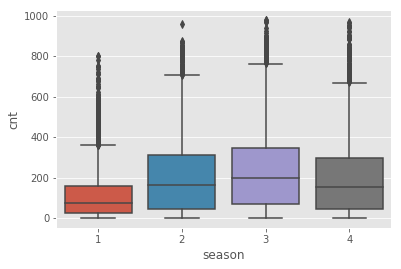

In [50]:
import seaborn as sns
sns.boxplot(x='season', y='cnt', data=data)

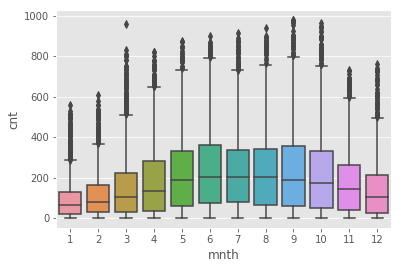

In [58]:
#spring and summer: demand is higher
sns.boxplot(x='mnth', y='cnt', data=data)

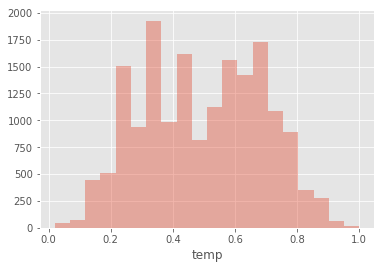

In [21]:
#summer months are higher in demand
sns.distplot(data['temp'], kde=False, bins=20)  

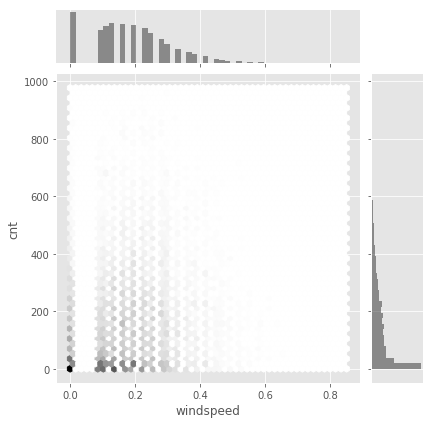

In [24]:
#too col and too hot surprisingly isnt good for demand
sns.jointplot(x = 'windspeed', y = 'cnt', data = data, kind='hex',color = 'black')

In [31]:
#lot of zeros, and not normal distribution
data[['cnt', 'workingday']].groupby(['workingday'], as_index = True).mean().sort_values(by = 'cnt')
#more rentals on working days

,cnt
workingday,
0,181.405332
1,193.207754


In [47]:
for col in numeric:
    print("mean absolute deviations are: " + col + "   " + str(pd.Series.mad(data[col])))

mean absolute deviations are: cnt   142.39984892741379
mean absolute deviations are: temp   0.1651747656118192
mean absolute deviations are: hr   nan
mean absolute deviations are: atemp   0.14532363520705116
mean absolute deviations are: hum   0.16331139896298938
mean absolute deviations are: windspeed   0.09631231746157656
mean absolute deviations are: casual   34.13996034250372
mean absolute deviations are: registered   114.39615505154916


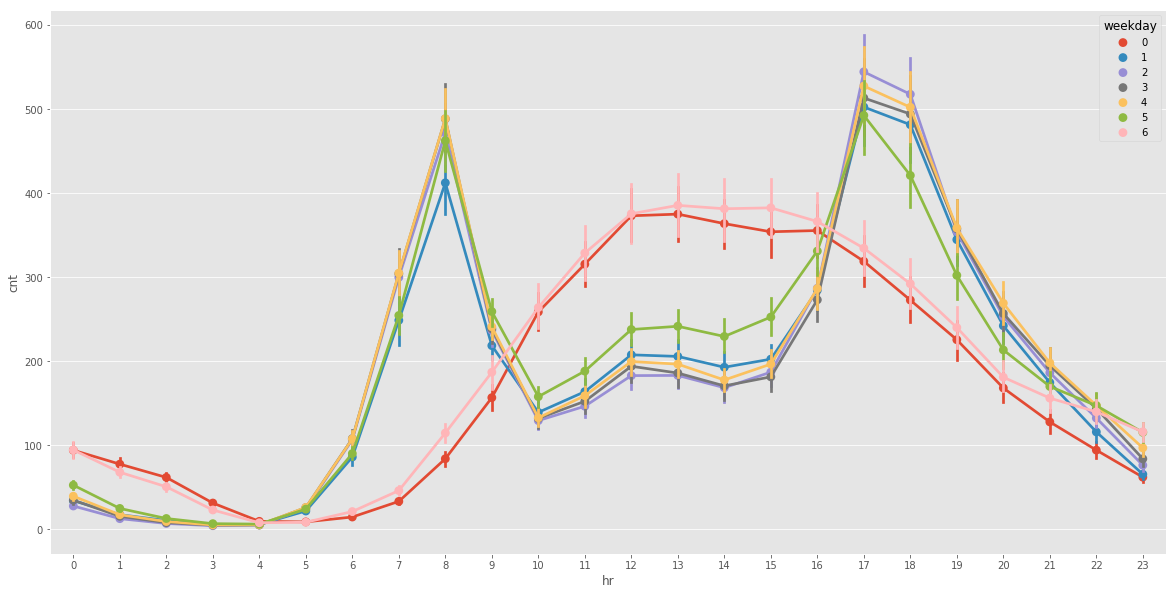

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data[['hr',
                       'cnt',
                       'weekday']],
            x='hr', y='cnt',
            hue='weekday', ax=ax)

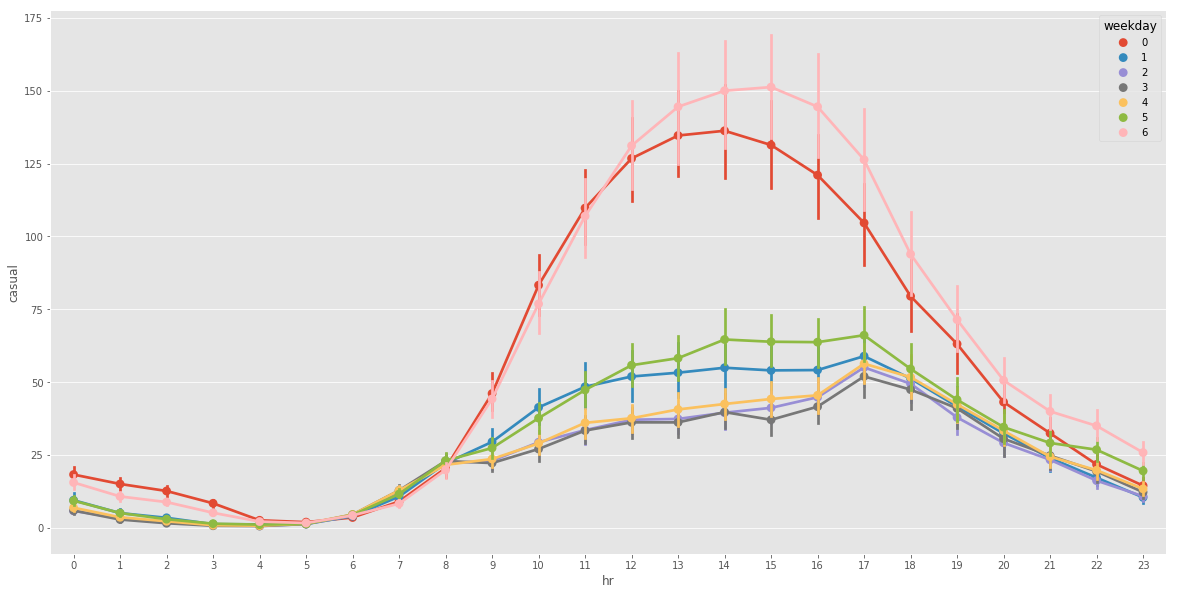

In [55]:
#work days have higher usage around times where people go to work and school, weekend is more normally distributed
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data[['hr', 'casual', 'weekday']],
            x='hr', y='casual',
            hue='weekday', ax=ax)

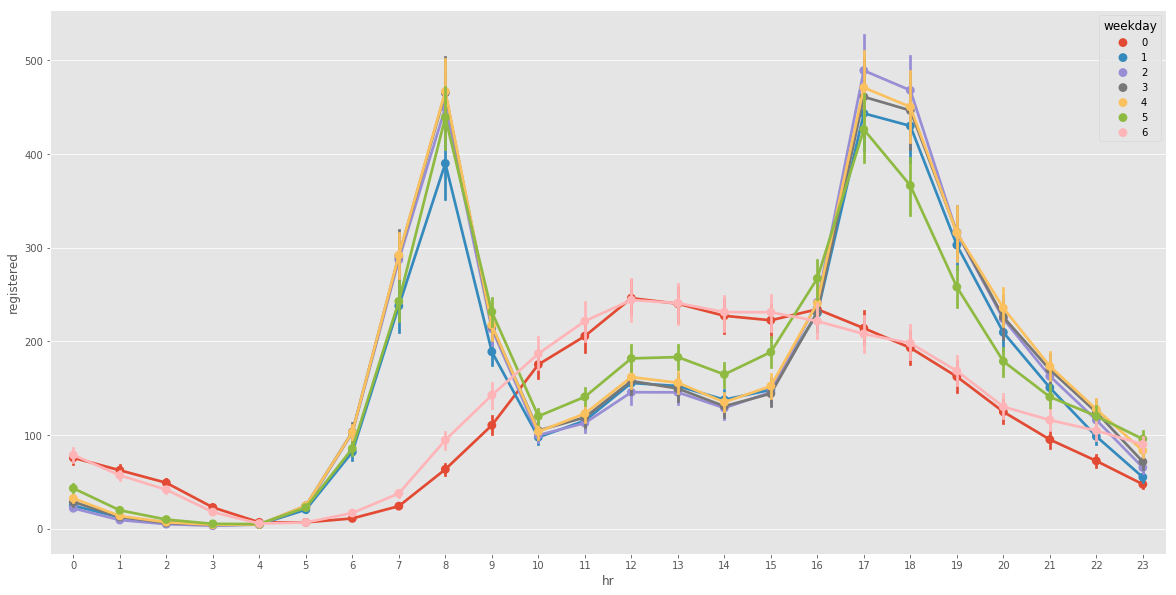

In [56]:
#casual users rent more during the working hours, an more on the weekends
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hr','registered','weekday']],
            x='hr', y='registered',
            hue='weekday', ax=ax)

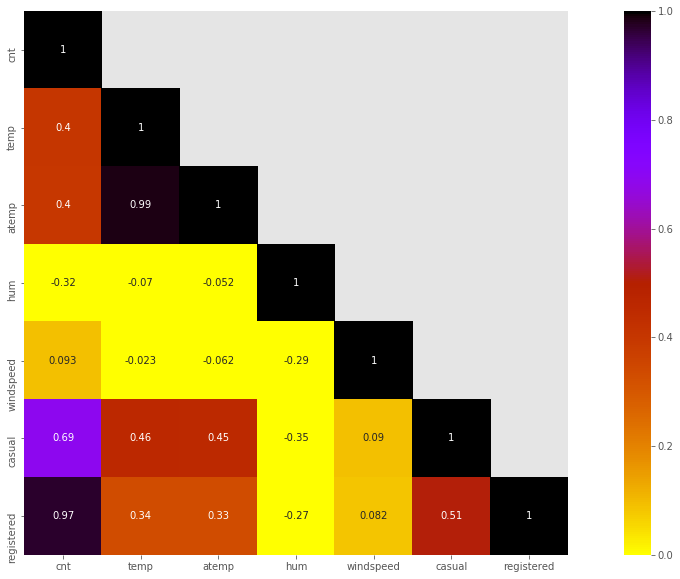

In [37]:
#registered users rent to go to work and school
#time for choosing predictors
numeric = ['cnt','temp','hr','atemp','hum', 'windspeed','casual','registered']
matrix = data[numeric].corr()
heat = np.array(corrmat)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="gnuplot_r")

In [59]:
#atemp and temp are almost identical. drop atemp. 
#temp and hum are important predictors. windspeed is irrelevent, drop it
data = data.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

In [61]:
#count looked bad for modeling, log() will be used to normalize count
import math
data['cnt'] = data['cnt'].transform(lambda x: math.log(x))

In [64]:
#one last thing is to bring categorized data to increase predictive power
data_dummy = data#create copy

columns_to_dummify = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
def dummify_dataset(data, column):       
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)],axis=1)
    data = data.drop([column], axis=1)
    return data


In [88]:
#scaling
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

C:\Users\Ghh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ghh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Ghh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [89]:

from sklearn.model_selection import train_test_split

y = data_dummy['cnt']
X = data_dummy.drop(['cnt'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.24,
                                                   random_state=29)

C:\Users\Ghh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


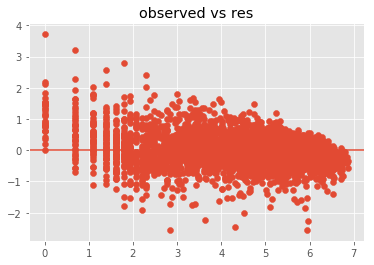

In [90]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
#etr.score()

# Plot the residuals
res = y_pred-y_test
fig, ax = plt.subplots()
ax.scatter(y_test, res)
ax.axhline()
ax.title.set_text('observed vs res')

plt.show()

In [91]:
RSMLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("root squared mean log error is:   " + str(RSMLE))


root squared mean log error is:   0.1404896806415728
